<a href="https://colab.research.google.com/github/jsaulme/Aprendizaje_Automatico_MCD/blob/main/tareas/08_Metricas_Desempeno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [ ]:
url = "https://raw.githubusercontent.com/jsaulme/datasets/main/Global_superstore2018__encoded.csv"
data = pd.read_csv(url)
data.head(3)

,Customer ID,Customer Name,Customer Name_encoded,Product ID,Product ID_encoded,Product Name,Product Name_encoded,Category,Category_encoded_0,Category_encoded_1,...,Market_encoded_3,Market_encoded_4,Region,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost
0,SC-2057582,Sonia Cooley,0.001111,OFF-LA-4658,0.000273,"Hon File Folder Labels, Adjustable",0.000273,Office Supplies,0,1,...,1,0,Central America,0.109495,0,3,0.0,13.08,4.56,2.033
1,KW-1657028,Kelly Williams,0.001384,FUR-FU-6238,0.000409,"Tenex Clock, Durable",0.000409,Furniture,1,0,...,1,0,South America,0.058257,0,8,0.0,252.16,90.72,13.449
2,KW-1657028,Kelly Williams,0.001384,FUR-BO-4845,0.000331,"Ikea 3-Shelf Cabinet, Mobile",0.000331,Furniture,1,0,...,1,0,South America,0.058257,0,2,0.0,193.28,54.08,9.627


In [ ]:
numeric_columns = data.select_dtypes(include=["number"]).columns
numeric_columns

Index(['Customer Name_encoded', 'Product ID_encoded', 'Product Name_encoded',
       'Category_encoded_0', 'Category_encoded_1', 'Category_encoded_2',
       'Sub-Category_encoded', 'Segment_encoded_0', 'Segment_encoded_1',
       'Segment_encoded_2', 'Order Priority_encoded_0',
       'Order Priority_encoded_1', 'Order Priority_encoded_2',
       'Order Priority_encoded_3', 'Order Day', 'Order Month', 'Order Year',
       'Ship Mode_encoded_0', 'Ship Mode_encoded_1', 'Ship Mode_encoded_2',
       'Ship Mode_encoded_3', 'Delivery Time', 'Ship Day', 'Ship Month',
       'Ship Year', 'City_encoded', 'State_encoded', 'Country_encoded',
       'Market_encoded_0', 'Market_encoded_1', 'Market_encoded_2',
       'Market_encoded_3', 'Market_encoded_4', 'Region_encoded', 'Postal Code',
       'Quantity', 'Discount', 'Sales', 'Profit', 'Ship Cost'],
      dtype='object')

# Analisis Exploratorio de Datos

In [ ]:
# Filtrar registros con profit negativo
data_negative_profit = data[data['Profit'] < 0]
data_negative_profit.head(3).iloc[:,50:]

,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost
16,0.109495,0,2,0.4,18.840,-6.600,1.602
17,0.109495,0,7,0.4,308.280,-149.100,27.770
18,0.109495,0,2,0.4,40.176,-6.064,2.137


In [ ]:
data_negative_profit.isna().sum()


Customer ID                 0
Customer Name               0
Customer Name_encoded       0
Product ID                  0
Product ID_encoded          0
Product Name                0
Product Name_encoded        0
Category                    0
Category_encoded_0          0
Category_encoded_1          0
Category_encoded_2          0
Sub-Category                0
Sub-Category_encoded        0
Segment                     0
Segment_encoded_0           0
Segment_encoded_1           0
Segment_encoded_2           0
Order ID                    0
Order Priority              0
Order Priority_encoded_0    0
Order Priority_encoded_1    0
Order Priority_encoded_2    0
Order Priority_encoded_3    0
Order Date                  0
Order Day                   0
Order Month                 0
Order Year                  0
Ship Mode                   0
Ship Mode_encoded_0         0
Ship Mode_encoded_1         0
Ship Mode_encoded_2         0
Ship Mode_encoded_3         0
Delivery Time               0
Ship Date 

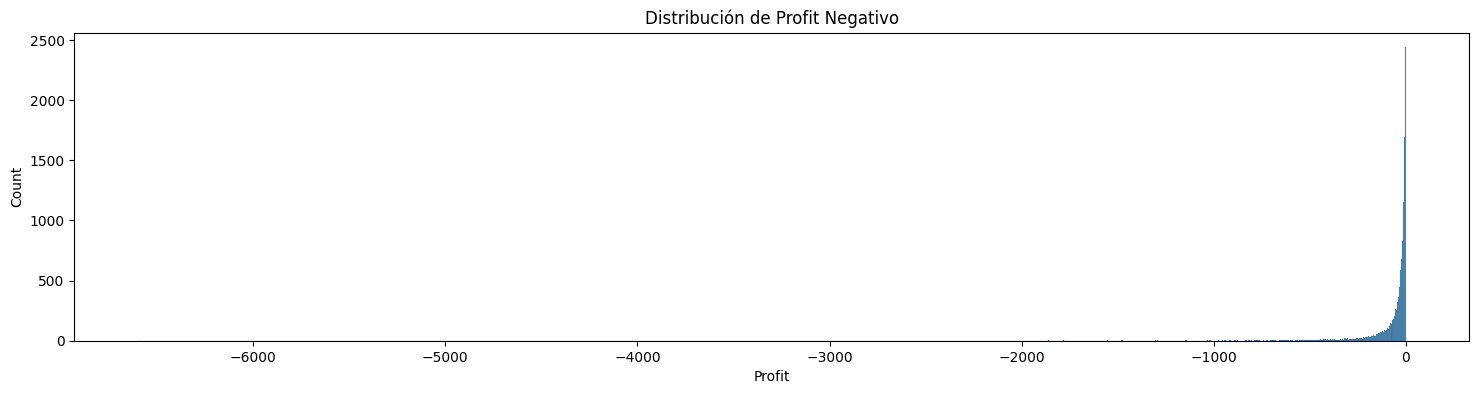

In [ ]:
# Establece el tamaño de la figura
# Exploración inicial
plt.figure(figsize=(18, 4))
sns.histplot(data_negative_profit['Profit'])
plt.title('Distribución de Profit Negativo')
plt.show()

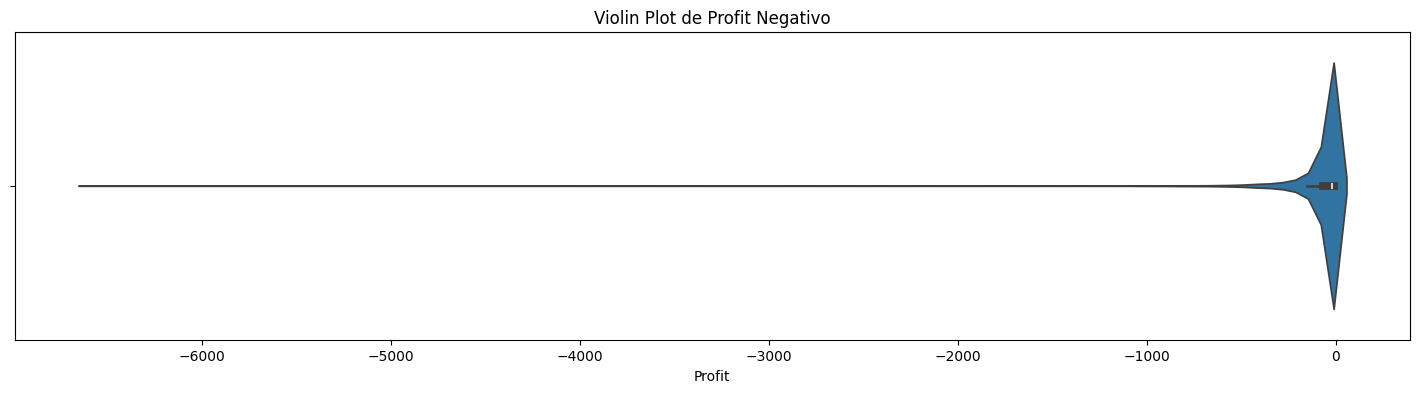

In [ ]:
# Establece el tamaño de la figura
plt.figure(figsize=(18, 4))
# Violin plot
sns.violinplot(x=data_negative_profit['Profit'])
plt.title('Violin Plot de Profit Negativo')
plt.show()

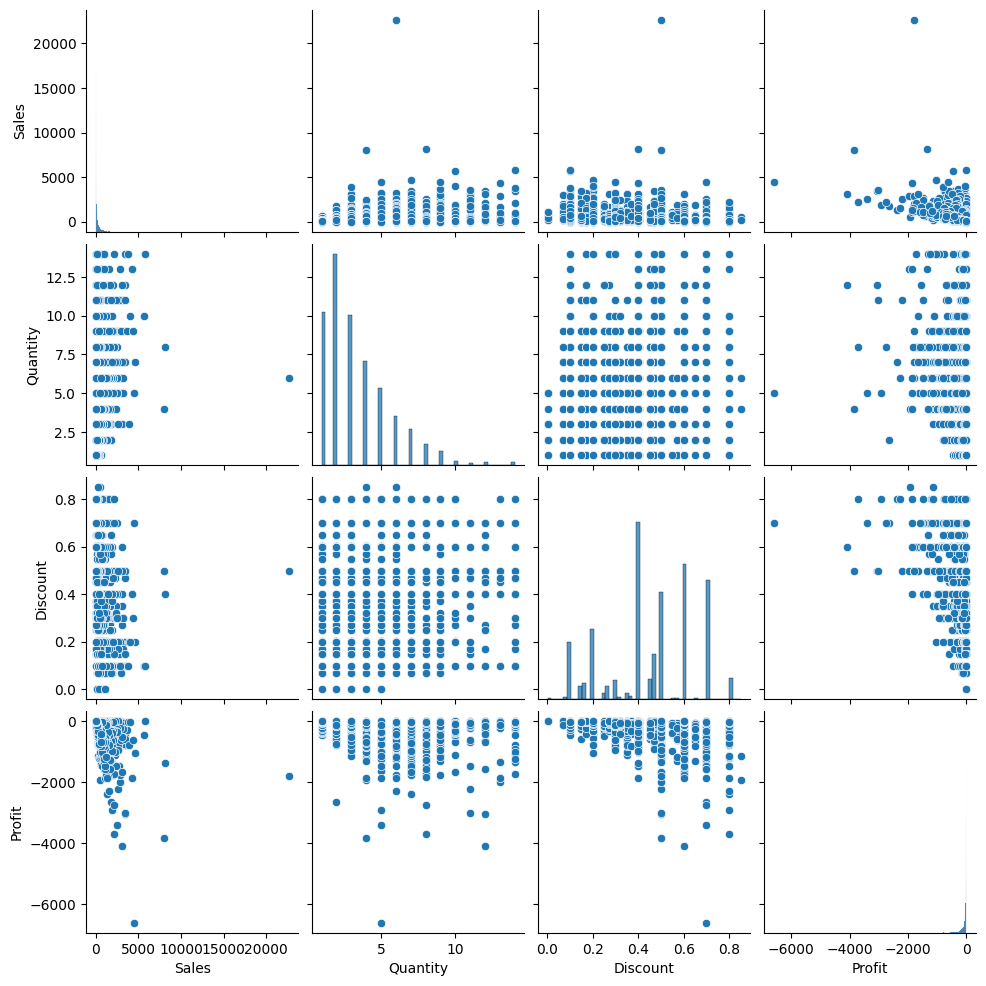

In [ ]:
# Relación entre características y Profit
sns.pairplot(data_negative_profit[['Sales', "Quantity", "Discount", "Profit"]])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características numéricas
features = (numeric_columns)

X = data_negative_profit[features]

# Normalizar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.2758255 ,  0.10052696,  0.10052696, ..., -0.42397045,
         0.35868988, -0.4183505 ],
       [ 0.2758255 , -0.35831319, -0.35831319, ...,  0.25905402,
        -0.40655561,  0.13475456],
       [ 0.2758255 , -0.03057119, -0.03057119, ..., -0.37362147,
         0.36156828, -0.40704237],
       ...,
       [ 3.00713747, -0.42386226, -0.42386226, ..., -0.45579962,
         0.36825948, -0.42579061],
       [ 3.00713747,  1.60815562,  1.60815562, ..., -0.45526158,
         0.38349995, -0.42240874],
       [ 3.00713747, -0.48941133, -0.48941133, ..., -0.35144866,
         0.32750009, -0.41543363]])

In [ ]:
# Crear un DataFrame con las características normalizadas
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head(3)

,Customer Name_encoded,Product ID_encoded,Product Name_encoded,Category_encoded_0,Category_encoded_1,Category_encoded_2,Sub-Category_encoded,Segment_encoded_0,Segment_encoded_1,Segment_encoded_2,...,Market_encoded_2,Market_encoded_3,Market_encoded_4,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost
0,0.275825,0.100527,0.100527,-0.574405,0.888794,-0.489414,-0.769576,-1.040521,1.525267,-0.467772,...,-0.457104,1.910332,-0.418691,1.766068,-0.373875,-0.626648,-0.271085,-0.423970,0.358690,-0.418350
1,0.275825,-0.358313,-0.358313,1.740933,-1.125120,-0.489414,-0.241121,-1.040521,1.525267,-0.467772,...,-0.457104,1.910332,-0.418691,1.766068,-0.373875,1.568334,-0.271085,0.259054,-0.406556,0.134755
2,0.275825,-0.030571,-0.030571,-0.574405,0.888794,-0.489414,-0.769576,-1.040521,1.525267,-0.467772,...,-0.457104,1.910332,-0.418691,1.766068,-0.373875,-0.626648,-0.271085,-0.373621,0.361568,-0.407042


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

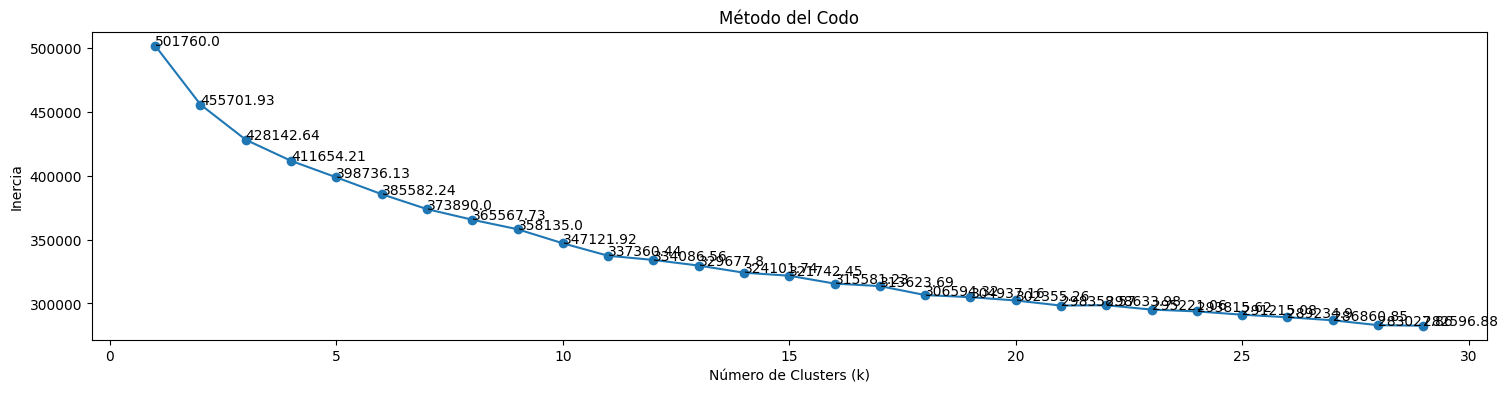

In [ ]:
# Aplica el metodo del codo para determinar el numero ideal de culsters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista para almacenar las inercias (suma de distancias al centroide más cercano)
inertia = []

# Rango de número de clusters a probar
k_range = range(1, 30)

# Calcular la inercia para cada número de clusters
for k in k_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X_scaled_df)
  inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(18, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Agregar anotaciones con el valor de la inercia a cada punto
for i, txt in enumerate(inertia):
    plt.annotate(round(txt, 2), (k_range[i], inertia[i]))

plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering con K-means
kmeans = KMeans(n_clusters=8)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluar la calidad de los clusters con el índice de Silueta
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

print(f'Índice de Silueta para K-means: {kmeans_silhouette:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Índice de Silueta para K-means: 0.07


In [ ]:
kmeans_labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [ ]:
import numpy as np

# Agregar etiquetas de cluster al dataframe
data_negative_profit['KMeans_Cluster'] = kmeans_labels
data_negative_profit.head(3).iloc[:,50:]

<ipython-input-67-3cce42c0b0ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_negative_profit['KMeans_Cluster'] = kmeans_labels


,Region_encoded,Postal Code,Quantity,Discount,Sales,Profit,Ship Cost,KMeans_Cluster
16,0.109495,0,2,0.4,18.840,-6.600,1.602,3
17,0.109495,0,7,0.4,308.280,-149.100,27.770,3
18,0.109495,0,2,0.4,40.176,-6.064,2.137,3


Resumen de clusters (K-means):
                Customer Name_encoded  Product ID_encoded  \
KMeans_Cluster                                              
0                            0.001301            0.000384   
1                            0.001312            0.000300   
2                            0.001301            0.000491   
3                            0.001314            0.000441   
4                            0.001321            0.000493   
5                            0.001317            0.000549   
6                            0.001313            0.000842   
7                            0.001321            0.000140   

                Product Name_encoded  Category_encoded_0  Category_encoded_1  \
KMeans_Cluster                                                                 
0                           0.000384            0.274656            0.395981   
1                           0.000300            0.517751            0.165680   
2                           0.000491  

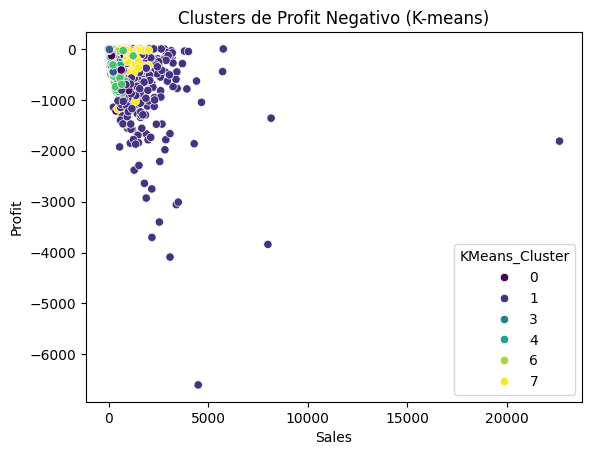

In [ ]:
# Selecciona solo las columnas numéricas
numeric_cols = data_negative_profit.select_dtypes(include=[np.number])

# Agrupa por 'KMeans_Cluster' y calcula la media solo para las columnas numéricas
kmeans_cluster_summary = numeric_cols.groupby(data_negative_profit['KMeans_Cluster']).mean()

print("Resumen de clusters (K-means):")
print(kmeans_cluster_summary)


# Visualización de clusters (K-means)
sns.scatterplot(x='Sales', y='Profit', hue='KMeans_Cluster', data=data_negative_profit, palette='viridis')
plt.title('Clusters de Profit Negativo (K-means)')
plt.show()

In [ ]:
# Definir características predictivas y objetivo
X = data[features]
y = data['Profit']

y

0         4.56
1        90.72
2        54.08
3         4.96
4        11.44
         ...  
51285     3.42
51286    18.42
51287    20.88
51288    33.84
51289    12.96
Name: Profit, Length: 51290, dtype: float64

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Selección de características
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)
scores = selector.scores_
scores

# Seleccion de caracateristicas
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Crear un dataframe con las puntuaciones de las características
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
feature_scores.head(10)

,Feature,Score
36,Discount,19.354894
37,Sales,16.003290
27,Country_encoded,9.727266
32,Market_encoded_4,8.445366
38,Ship Cost,7.637356
34,Postal Code,6.626595
5,Category_encoded_2,3.001891
3,Category_encoded_0,2.829146
25,City_encoded,2.822370
4,Category_encoded_1,2.755937


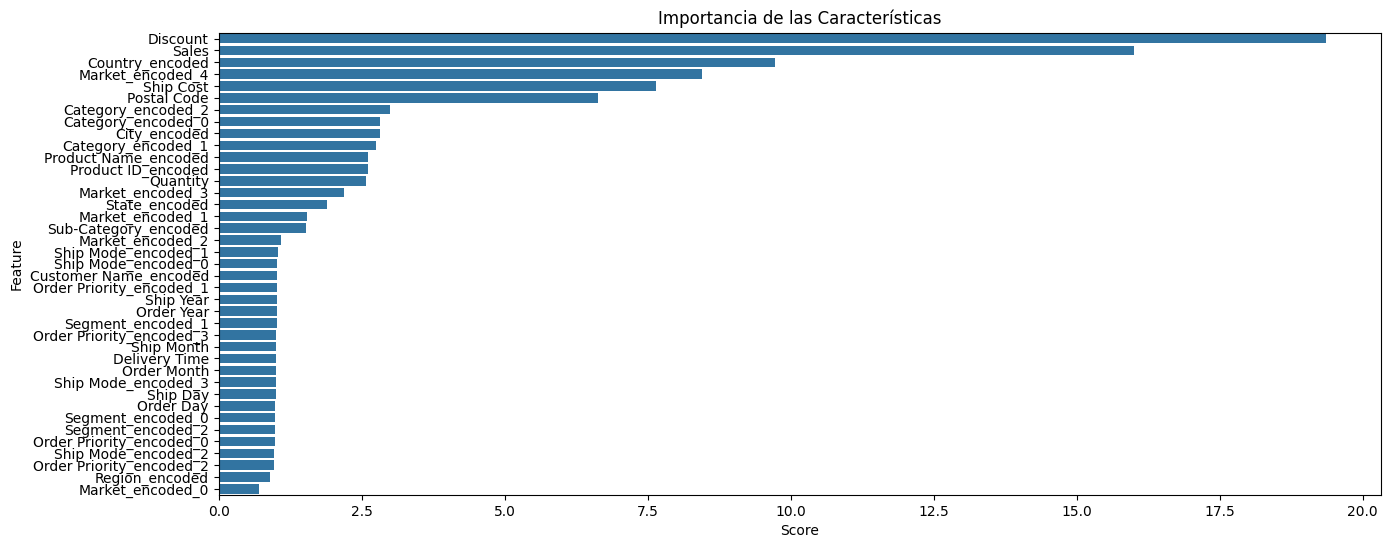

In [ ]:
# Visualización de las puntuaciones de las características
plt.figure(figsize=(15, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Importancia de las Características')
plt.show()

**El modelo SelectKBest no tiene métricas tradicionales como precisión o recuperación.**

En su lugar, proporciona puntuaciones para cada caracteristica según la función de puntuación elegida (f_classif en este caso).

In [ ]:
# Entrenar un modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor() # Use DecisionTreeRegressor para objetivo continuo
modelo_arbol.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Evaluar el modelo
precision = modelo_arbol.score(X_test, y_test)
print(f'Precisión del modelo: {precision:.2f}')

Precisión del modelo: 0.45


In [ ]:
# Importancia de las características según el modelo de árbol de decisión
importancia_caracteristicas = modelo_arbol.feature_importances_
caracteristicas_importantes = pd.DataFrame({'Feature': features, 'Importance': importancia_caracteristicas})
caracteristicas_importantes = caracteristicas_importantes.sort_values(by='Importance', ascending=False)

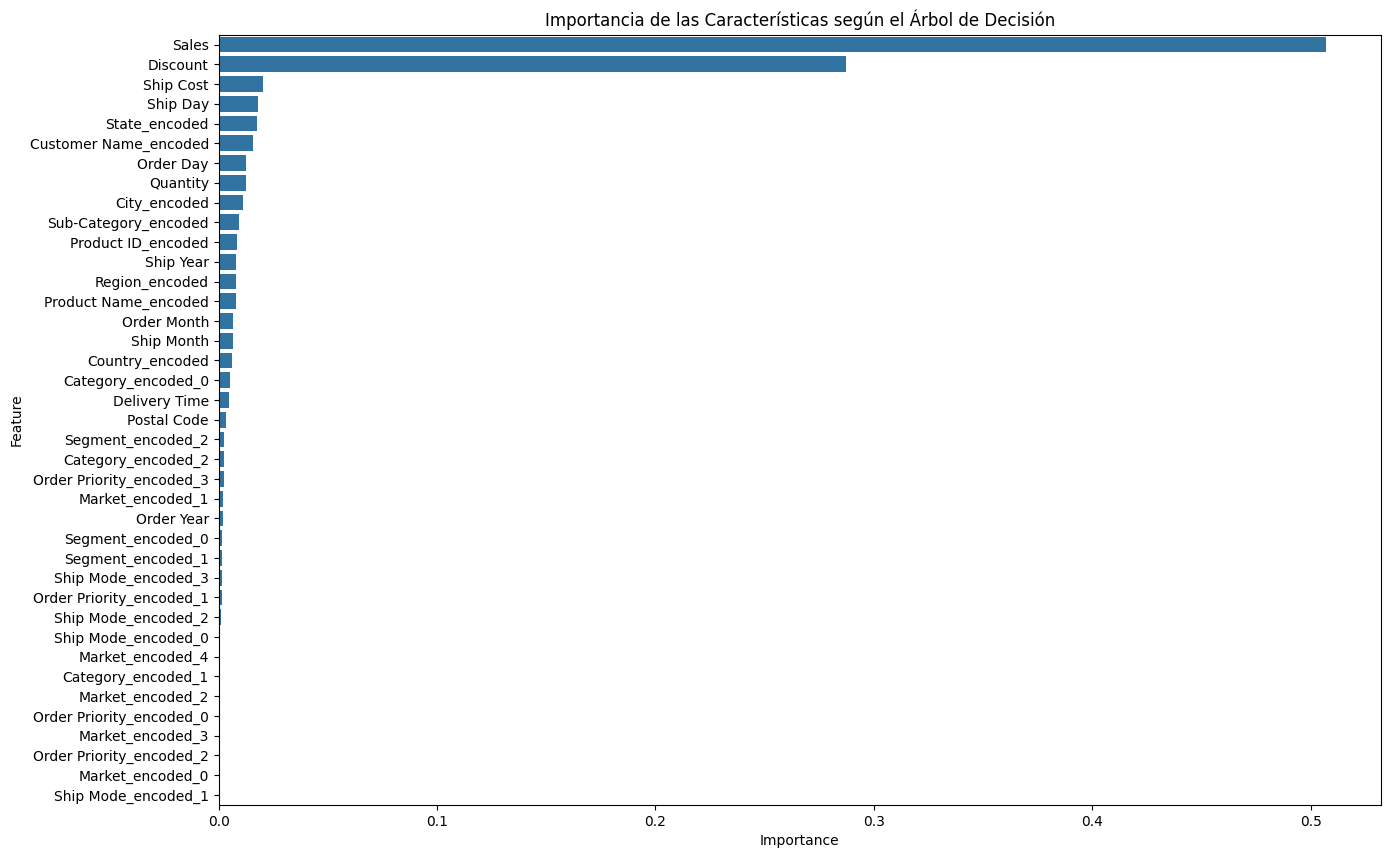

In [ ]:
# Visualización de la importancia de las características
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=caracteristicas_importantes)
plt.title('Importancia de las Características según el Árbol de Decisión')
plt.show()

In [ ]:
# Interpretación de resultados
print("Características más importantes según el modelo:")
print(caracteristicas_importantes.head(10))

Características más importantes según el modelo:
                  Feature  Importance
37                  Sales    0.506948
36               Discount    0.287342
38              Ship Cost    0.020330
22               Ship Day    0.018062
26          State_encoded    0.017495
0   Customer Name_encoded    0.015880
14              Order Day    0.012713
35               Quantity    0.012388
25           City_encoded    0.011365
6    Sub-Category_encoded    0.009333


In [ ]:
# Comparar las características seleccionadas por ambos métodos
print("Características más importantes según SelectKBest:")
print(feature_scores.head(10))
print("\n")
print("Características más importantes según el Árbol de Decisión:")
print(caracteristicas_importantes.head(10))

Características más importantes según SelectKBest:
               Feature      Score
36            Discount  19.354894
37               Sales  16.003290
27     Country_encoded   9.727266
32    Market_encoded_4   8.445366
38           Ship Cost   7.637356
34         Postal Code   6.626595
5   Category_encoded_2   3.001891
3   Category_encoded_0   2.829146
25        City_encoded   2.822370
4   Category_encoded_1   2.755937


Características más importantes según el Árbol de Decisión:
                  Feature  Importance
37                  Sales    0.506948
36               Discount    0.287342
38              Ship Cost    0.020330
22               Ship Day    0.018062
26          State_encoded    0.017495
0   Customer Name_encoded    0.015880
14              Order Day    0.012713
35               Quantity    0.012388
25           City_encoded    0.011365
6    Sub-Category_encoded    0.009333


### SelectKBest:
#### Puede mostrar características con alta correlación lineal con el profit. Es posible que algunas características sean seleccionadas debido a su fuerte relación individual con el objetivo.
### DecisionTreeRegressor:
#### Puede mostrar características que son importantes en la estructura del árbol debido a la capacidad del árbol para capturar interacciones complejas y no lineales entre las características y el objetivo.

In [ ]:
# Entrenar un modelo de árbol de decisión con las características seleccionadas
regressor = DecisionTreeRegressor()
regressor.fit(X_train_selected, y_train)

# Hacer predicciones
y_pred = regressor.predict(X_test_selected)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE del regresor con características seleccionadas: {mse:.2f}')

# Verificar información relevante del modelo entrenado
print(f'Número de características utilizadas para el entrenamiento: {X_train_selected.shape[1]}') # Número de columnas en X_train_selected
print(f'Importancia de las características utilizadas para el entrenamiento (índices): {regressor.feature_importances_}')
print(f'Número de nodos terminales: {regressor.get_n_leaves()}')
print(f'Altura del árbol: {regressor.get_depth()}')  # Altura del árbol

MSE del regresor con características seleccionadas: 17161.33
Número de características utilizadas para el entrenamiento: 39
Importancia de las características utilizadas para el entrenamiento (índices): [1.56276979e-02 7.63222608e-03 6.60293567e-03 1.26588121e-03
 9.36249672e-04 2.46356636e-03 9.69033592e-03 2.67103657e-03
 1.35864850e-03 2.45932499e-03 4.89844215e-04 2.05263170e-03
 3.78516986e-04 2.21387925e-03 1.24007468e-02 6.19356189e-03
 2.35023562e-03 8.34501526e-04 1.68253488e-04 7.89533364e-04
 1.13940218e-03 5.47573626e-03 2.55093538e-02 8.07718629e-03
 6.35848831e-03 1.08079362e-02 1.74009843e-02 7.06843779e-03
 2.66529295e-04 2.37872426e-03 7.09215099e-04 4.86003482e-04
 7.25302016e-04 8.26751984e-03 2.62405349e-03 1.20807946e-02
 2.83268394e-01 5.07930320e-01 2.08460112e-02]
Profundidad del árbol: 44
Número de nodos terminales: 38538
Altura del árbol: 44
